# Module Imports

In [1]:
from tqdm.notebook import tqdm as tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg


# Load Data

In [10]:
metadata = pd.read_csv('../data/output/metadata_nona.csv', index_col=False)
metadata.age = metadata.age.round(2)
metadata.head()

,age,predicted_age,tissue,Sex,delta,EarNotch,Color,DeathWeight,Cage,lab_id,sample_id
0,22.05,12.912954,Kidney,F,-9.132673,N,AG,35.1,1,204375590020_R01C02,1
1,22.05,11.568242,Liver,F,-10.477385,N,AG,35.1,1,204375590004_R01C02,1
2,22.05,14.191182,Heart,F,-7.854445,N,AG,35.1,1,204375590020_R01C01,1
3,22.05,15.299708,L Gastroc,F,-6.745919,N,AG,35.1,1,204375590004_R01C01,1
4,22.05,14.440024,Kidney,F,-7.605604,R,BAG,40.3,1,204375590025_R01C02,8


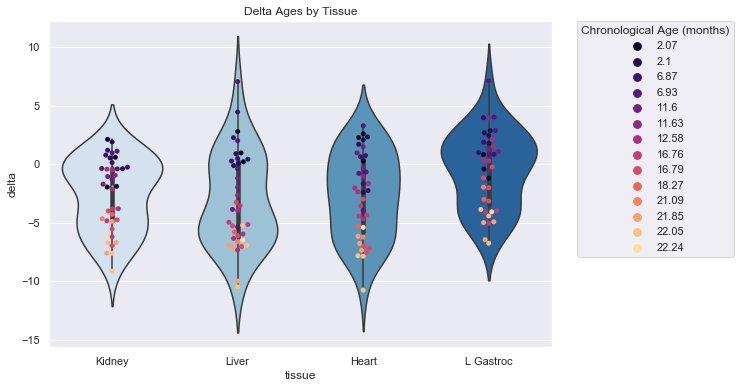

In [4]:
# Layered violinplot and swarmplot, color-coded by chronological age

# CONSIDER BINNING AGES? 0-5 months 6-10 months 11-15 months etc? easier to read

plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.violinplot(x='tissue', y="delta", data=metadata, palette='Blues')
sns.swarmplot(x='tissue', y="delta", data=metadata, hue='age', palette='magma')
plt.title('Delta Ages by Tissue')
plt.legend(title="Chronological Age (months)", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

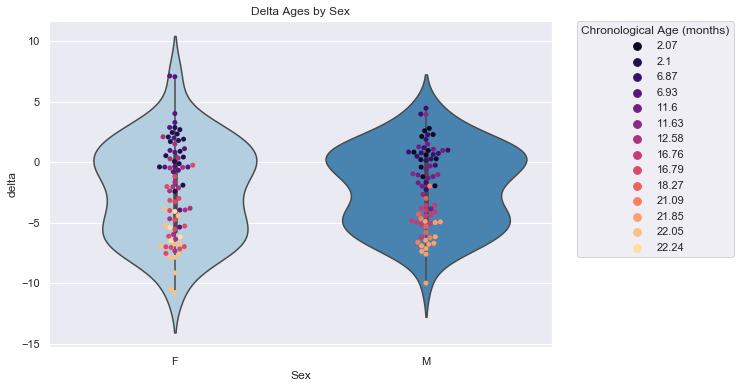

In [5]:
plt.figure(figsize=(9,6))
sns.violinplot(x='Sex', y="delta", data=metadata, palette="Blues")
sns.swarmplot(x='Sex', y="delta", data=metadata, hue="age", palette='magma')
plt.legend(title="Chronological Age (months)", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Delta Ages by Sex')
plt.show()

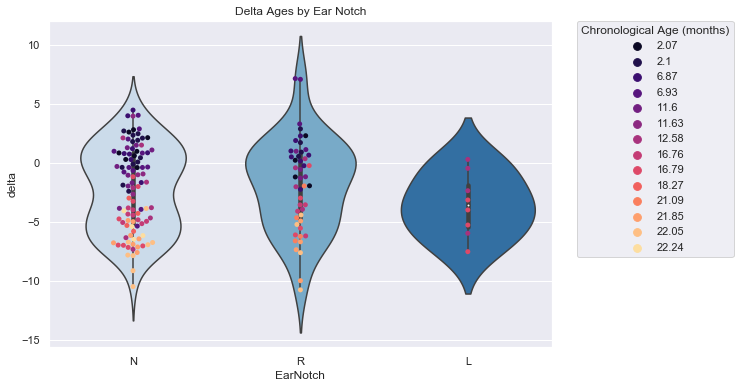

In [6]:
plt.figure(figsize=(9,6))
sns.violinplot(x='EarNotch', y="delta", data=metadata, palette="Blues")
sns.swarmplot(x='EarNotch', y="delta", data=metadata, hue="age", palette='magma')
plt.legend(title="Chronological Age (months)", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Delta Ages by Ear Notch')
plt.show()

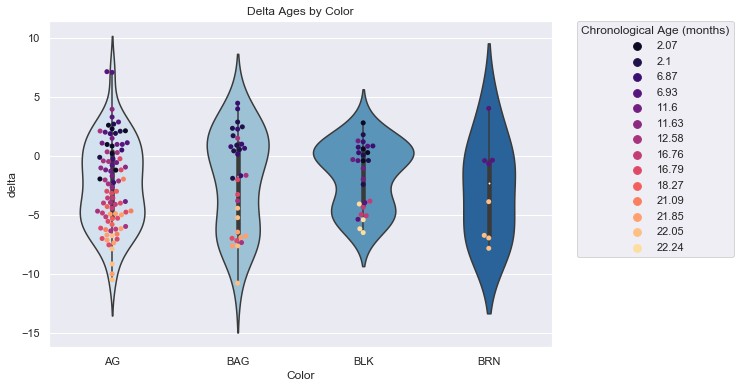

In [7]:
plt.figure(figsize=(9,6))
sns.violinplot(x='Color', y="delta", data=metadata, palette='Blues')
sns.swarmplot(x='Color', y="delta", data=metadata, hue="age", palette='magma')
plt.legend(title="Chronological Age (months)", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Delta Ages by Color')
plt.show()

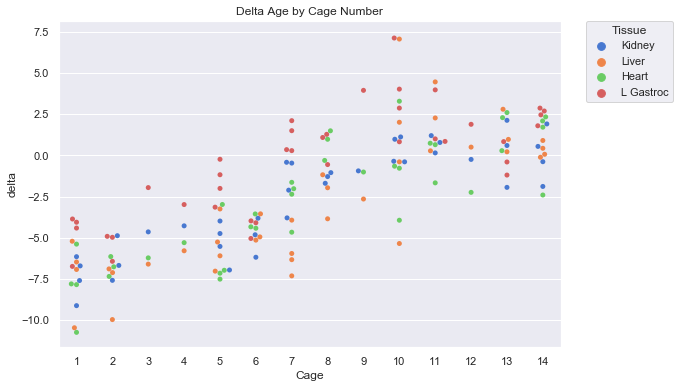

In [8]:
plt.figure(figsize=(9,6))
plt.title("Delta Age by Cage Number")
sns.swarmplot(data=metadata, x='Cage', y='delta', hue='tissue', palette="muted")
plt.legend(title="Tissue", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

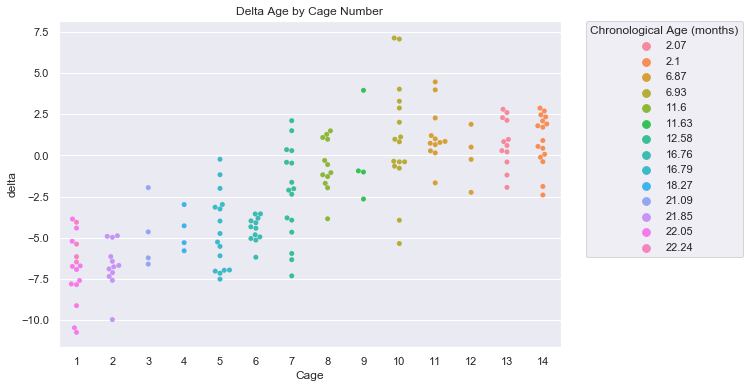

In [9]:
plt.figure(figsize=(9,6))
plt.title("Delta Age by Cage Number")
sns.swarmplot(data=metadata, x='Cage', y='delta', hue='age')
plt.legend(title="Chronological Age (months)", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Partial Correlations

## Cage and Delta Age (adjust for Chronological Age)

In [12]:
# correlation between Cage and Delta Age adjusted for Chronological Age
pg.partial_corr(data=metadata, x='Cage', y='delta', covar='age')

,n,r,CI95%,p-val
pearson,156,0.016471,"[-0.14, 0.17]",0.838806


In [13]:
pg.partial_corr(data=metadata, x='Cage', y='delta', covar='age').to_markdown()

'|         |   n |         r | CI95%         |    p-val |\n|:--------|----:|----------:|:--------------|---------:|\n| pearson | 156 | 0.0164714 | [-0.14  0.17] | 0.838806 |'

## Predicted Age by Tissue Adjusted for Chronological Age 

In [78]:
# correlation between tissue adjusted for chronological age
data = metadata.loc[metadata.tissue=='Heart']
liver = metadata[metadata.tissue=='Liver']
kidney = metadata[metadata.tissue=='Kidney']
gastro = metadata[metadata.tissue=='L Gastroc']

# add tissue_predicted age column
data.loc[:, ['gastro_predicted_age']] = gastro['predicted_age'].values
data.loc[:, ['liver_predicted_age']] = liver['predicted_age'].values
data.loc[:, ['kidney_predicted_age']] = kidney['predicted_age'].values

/Users/patriciagirardi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [56]:
data.head()

,age,predicted_age,tissue,Sex,delta,EarNotch,Color,DeathWeight,Cage,lab_id,sample_id,gastro_predicted_age,liver_predicted_age,kidney_predicted_age
2,22.045627,14.191182,Heart,F,-7.854445,N,AG,35.1,1,204375590020_R01C01,1,15.299708,11.568242,12.912954
6,22.045627,11.289446,Heart,F,-10.756182,R,BAG,40.3,1,204375590025_R01C01,8,17.629830,16.829556,14.440024
10,22.242757,16.851532,Heart,F,-5.391225,N,BLK,31.6,1,204375590020_R02C02,15,18.183245,15.763295,16.087329
14,22.045627,14.235143,Heart,F,-7.810484,N,BRN,36.1,1,204375590025_R02C01,22,18.181941,15.112820,15.330360
18,21.848498,14.493323,Heart,M,-7.355175,R,AG,50.9,2,204375590020_R03C01,29,16.930447,11.869138,15.161932


In [57]:
# Partial Correlations between predicted ages of different tissue types (adjusted for chronological age)

print("Heart vs. Gastro:\n" + str(pg.partial_corr(data=data, x='predicted_age', y='gastro_predicted_age', covar='age')) + "\n\n")
print("Heart vs. Liver:\n" + str(pg.partial_corr(data=data, x='predicted_age', y='liver_predicted_age', covar='age')) + "\n\n")
print("Heart vs. Kidney:\n" + str(pg.partial_corr(data=data, x='predicted_age', y='kidney_predicted_age', covar='age')) + "\n\n")

print("Gastro vs. Liver:\n" + str(pg.partial_corr(data=data, x='gastro_predicted_age', y='liver_predicted_age', covar='age')) + "\n\n")
print("Gastro vs. Kidney:\n" + str(pg.partial_corr(data=data, x='gastro_predicted_age', y='kidney_predicted_age', covar='age')) + "\n\n")

print("Liver vs. Kidney:\n" + str(pg.partial_corr(data=data, x='liver_predicted_age', y='kidney_predicted_age', covar='age')))


Heart vs. Gastro:
          n         r          CI95%     p-val
pearson  39  0.255476  [-0.07, 0.53]  0.121606


Heart vs. Liver:
          n         r          CI95%     p-val
pearson  39  0.235198  [-0.09, 0.52]  0.155184


Heart vs. Kidney:
          n         r         CI95%     p-val
pearson  39  0.318549  [-0.0, 0.58]  0.051274


Gastro vs. Liver:
          n        r          CI95%     p-val
pearson  39  0.27595  [-0.05, 0.55]  0.093546


Gastro vs. Kidney:
          n         r         CI95%     p-val
pearson  39  0.499654  [0.21, 0.71]  0.001404


Liver vs. Kidney:
          n         r          CI95%     p-val
pearson  39  0.254196  [-0.07, 0.53]  0.123549
